
# Classification Analysis From Scratch
### Siddhesh Ashok Gholap
#### Date: 24 March 2024

---


The results of the classification analysis are presented below with visualizations and interpretations.

---


**Part-1) Least squares approach to classification**

a). Data generation: Considered a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employed these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Found the decision boundary: Assigned the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implemented the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluated the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculated the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualized the decision boundary with test points Superimposed onto the decision boundary plot.

e). Assigned the value "-1" to class1 and the value "+1" to class 2. Repeated the experiments.

f). Experimented with Laplacian distribution and compared the performance of it with the Gaussian distribution experiments

g). Observations




In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

Accuracy of the decision boundary: 0.8875


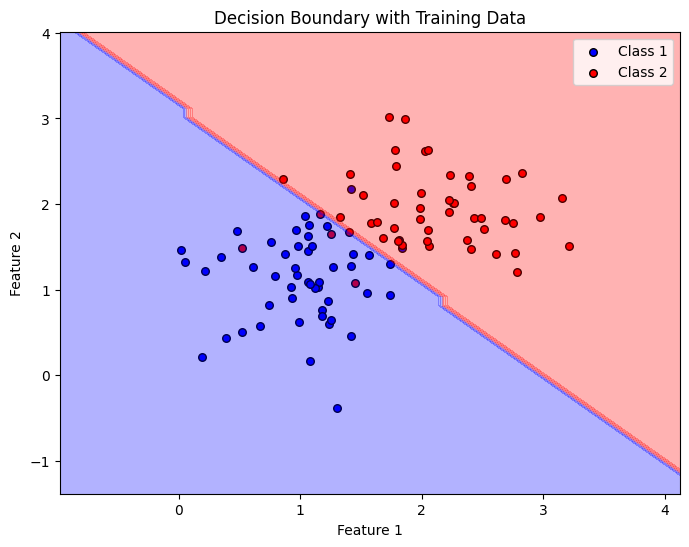

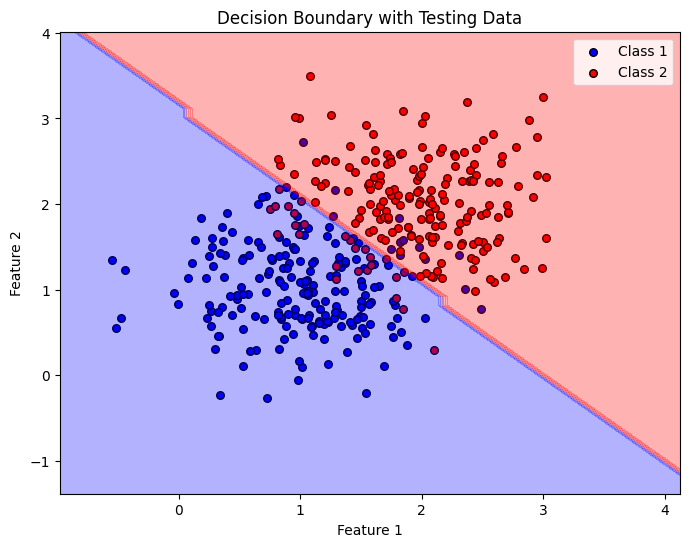

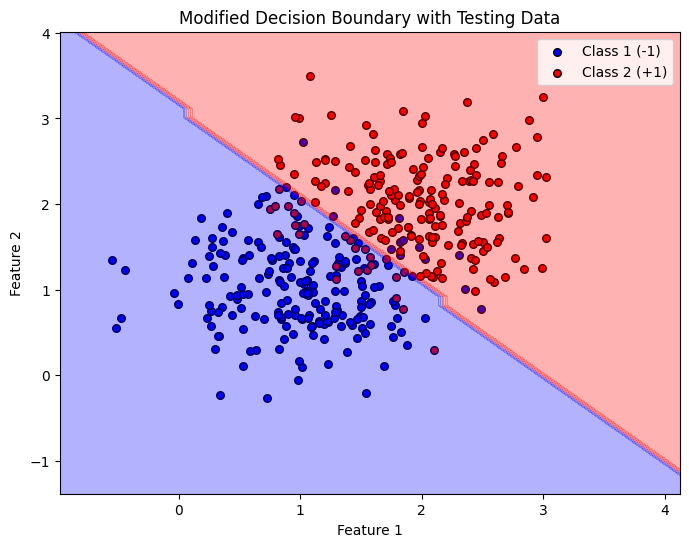

Accuracy of the decision boundary with Laplacian distribution: 0.94


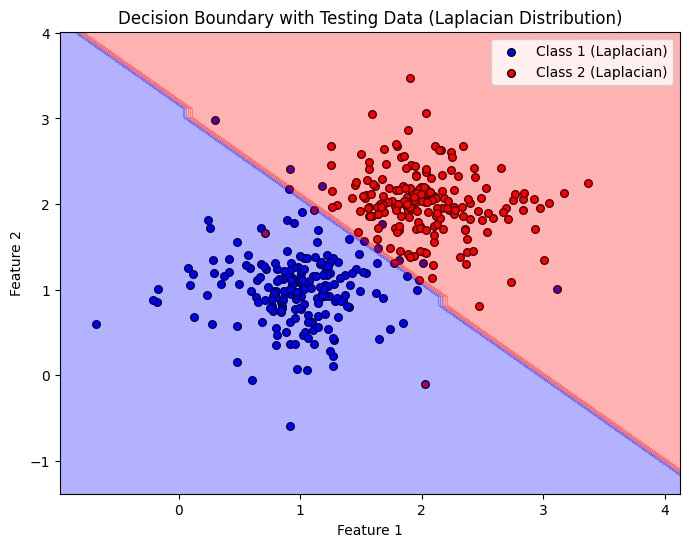

In [162]:

########################################
#Part-1)-a: Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Class labels. Assign "0" to class1 and "1" to class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))  # Class labels. Assign "0" to class1 and "1" to class2.


########################################
#Part-1)-b: Find the decision boundary
########################################

def LS_Classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels
    # Implement pseudo inverse solution to get the weight vector
    X_train_pseudo_inv = np.linalg.pinv(X_train)
    w = np.dot(X_train_pseudo_inv, Y_train)
    
    # Predict the labels of test data using the pseudo-inverse solution
    predictions = np.dot(X_test, w)
    predictions = np.where(predictions >= 0.5, 1, 0)  # Threshold at 0.5
    
    return predictions

# Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)

##########################################
# Part-1)-c: Evaluate the quality of decision boundary
##########################################

def LS_Classify_Accuracy(Y_test, Y_pred):
    # Inputs: Ground truth test labels and predicted test labels
    # Outputs: Accuracy
    # Compute the accuracy
    accuracy = np.mean(Y_test == Y_pred)
    
    return accuracy

# Compute the accuracy of the decision boundary
accuracy = LS_Classify_Accuracy(te_targets, predictions)
print(f"Accuracy of the decision boundary: {accuracy}")



##########################################
#Part-1)-d: Visualize the decision boundary
##########################################

# Augment training data with a column of ones for bias
X_train_aug = np.hstack((tr_data, np.ones((len(tr_data), 1))))

# Compute the weight vector using pseudo-inverse
w = np.dot(np.linalg.pinv(X_train_aug), tr_targets)

# Plotting the decision boundary with training data
# Plotting the decision boundary with training data
plt.figure(figsize=(8, 6))

# Scatter plot for Class 1 (Blue)
plt.scatter(tr_data[tr_targets == 0, 0], tr_data[tr_targets == 0, 1], c='blue',edgecolors='k', s=30, label='Class 1')
# Scatter plot for Class 2 (Red)
plt.scatter(tr_data[tr_targets == 1, 0], tr_data[tr_targets == 1, 1], c='red',edgecolors='k', s=30, label='Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Training Data')

# Add legend with labels for Class 1 (Blue) and Class 2 (Red)
plt.legend()
#plt.legend(['Class 1', 'Class 2'])

# Plot the decision boundary line
x_min, x_max = tr_data[:, 0].min() - 1, tr_data[:, 0].max() + 1
y_min, y_max = tr_data[:, 1].min() - 1, tr_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.dot(np.hstack((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1), np.ones((len(xx.ravel()), 1)))), w)
Z = np.where(Z >= 0.5, 1, 0)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))

plt.show()

# Plotting the decision boundary with testing data
plt.figure(figsize=(8, 6))

# Scatter plot for Class 1 (Blue)
plt.scatter(te_data[te_targets == 0, 0], te_data[te_targets == 0, 1], c='blue', edgecolors='k', s=30, label='Class 1')
# Scatter plot for Class 2 (Red)
plt.scatter(te_data[te_targets == 1, 0], te_data[te_targets == 1, 1], c='red', edgecolors='k', s=30, label='Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Testing Data')

# Add legend with labels for Class 1 (Blue) and Class 2 (Red)
plt.legend()

#plt.legend(['Class 1', 'Class 2'])

# Plot the decision boundary line
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))

plt.show()


##########################################
# Part-1)-e: Change the target label notation, and repeat the experiments
##########################################

# Change the target labels to -1 for Class 1 and +1 for Class 2
tr_targets_modified = np.where(tr_targets == 0, -1, 1)
te_targets_modified = np.where(te_targets == 0, -1, 1)

def LS_Classify2(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels
    # Implement pseudo inverse solution to get the weight vector
    X_train_pseudo_inv = np.linalg.pinv(X_train)
    w = np.dot(X_train_pseudo_inv, Y_train)
    
    # Predict the labels of test data using the pseudo-inverse solution
    predictions = np.dot(X_test, w)
    predictions = np.where(predictions >= 0.5, 1, -1)  # Threshold at 0 for labels -1 and +1
    
    return predictions



# Get the test data predictions with modified labels
predictions_modified = LS_Classify2(tr_data, tr_targets_modified, te_data)


# Plotting the decision boundary with testing data using modified labels
plt.figure(figsize=(8, 6))

# Scatter plot for Class 1 (Blue)
plt.scatter(te_data[te_targets_modified == -1, 0], te_data[te_targets_modified == -1, 1], c='blue', edgecolors='k', s=30, label='Class 1 (-1)')
# Scatter plot for Class 2 (Red)
plt.scatter(te_data[te_targets_modified == 1, 0], te_data[te_targets_modified == 1, 1], c='red', edgecolors='k', s=30, label='Class 2 (+1)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Modified Decision Boundary with Testing Data')

# Add legend with labels for Class 1 (-1) and Class 2 (+1)
plt.legend()

# Plot the decision boundary line with modified labels
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))

plt.show()

##########################################
# Part-1)-f: Repeat the experiments with Laplacian distribution
##########################################

# Set the parameters for Laplacian distribution
mean1_lap = [1, 1]           # Mean of class1 for Laplacian distribution
mean2_lap = [2, 2]           # Mean of class2 for Laplacian distribution
scale = 0.3                  # Scale parameter for Laplacian distribution

# Generate training data with Laplacian distribution
class1_tr_lap = np.random.laplace(mean1_lap, scale, (50, 2))  # Class1 training data with Laplacian distribution
class2_tr_lap = np.random.laplace(mean2_lap, scale, (50, 2))  # Class2 training data with Laplacian distribution
tr_data_lap = np.vstack((class1_tr_lap, class2_tr_lap))  # Combine class1 training and class2 training data
tr_targets_lap = np.hstack((np.zeros(50), np.ones(50)))  # Class labels. Assign "0" to class1 and "1" to class2

# Generate testing data with Laplacian distribution
class1_te_lap = np.random.laplace(mean1_lap, scale, (200, 2))  # Class1 testing data with Laplacian distribution
class2_te_lap = np.random.laplace(mean2_lap, scale, (200, 2))  # Class2 testing data with Laplacian distribution
te_data_lap = np.vstack((class1_te_lap, class2_te_lap))  # Combine class1 testing and class2 testing data
te_targets_lap = np.hstack((np.zeros(200), np.ones(200)))  # Class labels. Assign "0" to class1 and "1" to class2

# Get the test data predictions with Laplacian distribution
predictions_lap = LS_Classify(tr_data_lap, tr_targets, te_data_lap)

# Compute the accuracy of the decision boundary with Laplacian distribution
accuracy_lap = LS_Classify_Accuracy(te_targets, predictions_lap)
print(f"Accuracy of the decision boundary with Laplacian distribution: {accuracy_lap}")

# Plotting the decision boundary with testing data using Laplacian distribution
plt.figure(figsize=(8, 6))

# Scatter plot for Class 1 (Blue)
plt.scatter(te_data_lap[te_targets == 0, 0], te_data_lap[te_targets == 0, 1], c='blue', edgecolors='k', s=30, label='Class 1 (Laplacian)')
# Scatter plot for Class 2 (Red)
plt.scatter(te_data_lap[te_targets == 1, 0], te_data_lap[te_targets == 1, 1], c='red', edgecolors='k', s=30, label='Class 2 (Laplacian)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Testing Data (Laplacian Distribution)')

# Add legend with labels for Class 1 (Laplacian) and Class 2 (Laplacian)
plt.legend()

# Plot the decision boundary line with Laplacian distribution
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))

plt.show()


<b> Observations </b>

1. Its observed that we get a good accuracy for both gaussian and laplacian distributions.

2. However the accuracy is slightly better in case of laplacian one.

3. On changing the labels just no change is observed in the decision boundary.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> This segment covers the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Considered a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employed these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Developed a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Projected the previously generated 2-D synthetic data into 1-D and conducted classification. Plotted both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Created a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Projected the previously generated 2-D synthetic data into 1-D and conducted classification. Plotted both the original and projected data points on the same graph.

d). Extended Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Observations


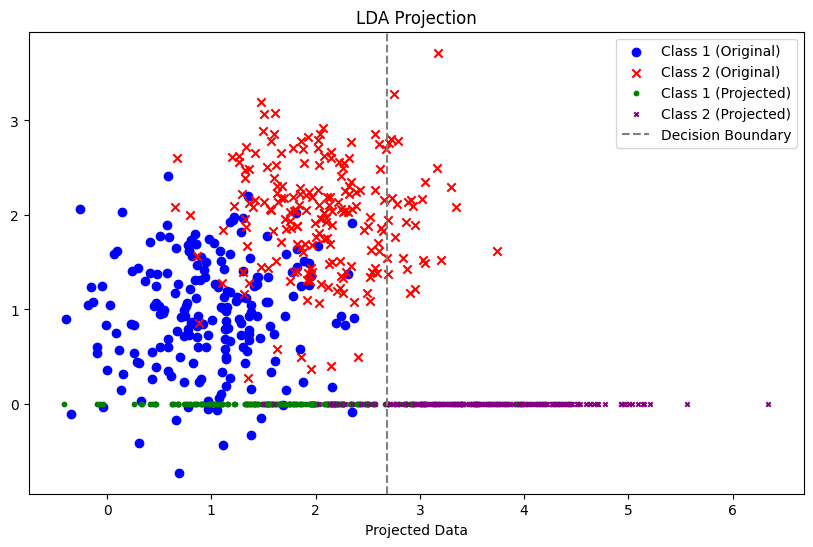

Accuracy with LDA: 89.75


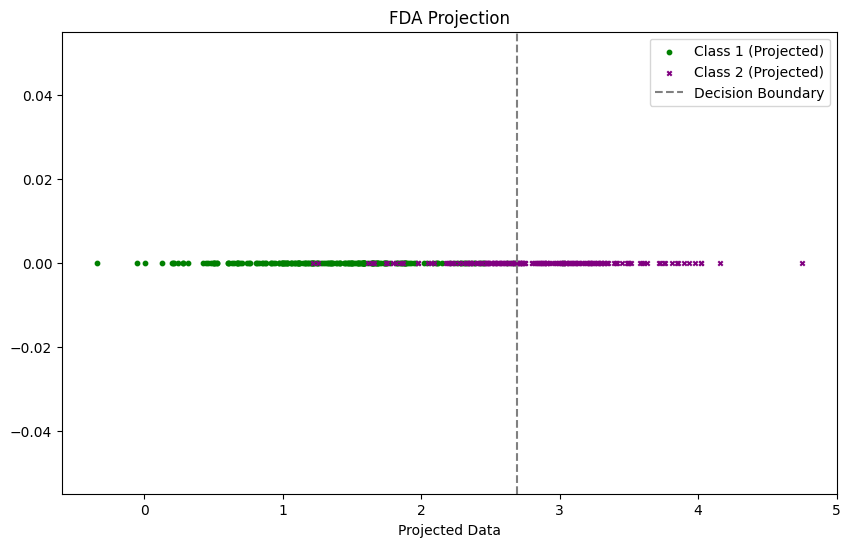

Accuracy with FDA: 90.0
Projection matrix (k=1):
[[0.81018523]
 [0.58617395]]


In [168]:
########################################
#Part-2)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

########################################
#Part-2)-(b)
########################################

def LDA_classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Between class covariance
    mean1 = np.mean(X_train[Y_train == 0], axis=0)
    mean2 = np.mean(X_train[Y_train == 1], axis=0)
    w = mean2 - mean1
    proj_train = np.dot(X_train, w)
    proj_test = np.dot(X_test, w)
    threshold = (np.mean(proj_train[Y_train == 0]) + np.mean(proj_train[Y_train == 1])) / 2
    predictions = (proj_test > threshold).astype(int)
    return predictions, w

def threshold_for_plotting(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Between class covariance
    mean1 = np.mean(X_train[Y_train == 0], axis=0)
    mean2 = np.mean(X_train[Y_train == 1], axis=0)
    w = mean2 - mean1
    proj_train = np.dot(X_train, w)
    proj_test = np.dot(X_test, w)
    threshold = (np.mean(proj_train[Y_train == 0]) + np.mean(proj_train[Y_train == 1])) / 2
    return threshold
  
threshold = threshold_for_plotting(tr_data, tr_targets, te_data)

def LDA_project(w, X_test, Y_test):
    # Inputs: weight vector, testing data, and testing labels
    proj_test = np.dot(X_test, w)
    plt.figure(figsize=(10, 6))
    
    # Original data points
    plt.scatter(class1_te[:, 0], class1_te[:, 1], label='Class 1 (Original)', marker='o', color='blue')
    plt.scatter(class2_te[:, 0], class2_te[:, 1], label='Class 2 (Original)', marker='x', color='red')
    
    # Projected data points
    plt.scatter(proj_test[te_targets == 0], np.zeros_like(proj_test[te_targets == 0]), label='Class 1 (Projected)', marker='o', s=10, color='green')
    plt.scatter(proj_test[te_targets == 1], np.zeros_like(proj_test[te_targets == 1]), label='Class 2 (Projected)', marker='x', s=10, color='purple')
    
    
    # Plot decision boundary
    plt.axvline(x=threshold, color='gray', linestyle='--', label='Decision Boundary')
    
    plt.xlabel('Projected Data')
    plt.title('LDA Projection')
    plt.legend()
    plt.show()

predictions, w = LDA_classify(tr_data, tr_targets, te_data)
LDA_project(w, te_data, te_targets)

# Compute and print the accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with LDA:', acc * 100)
 

########################################
#Part-2)-(c)
########################################

def FDA_classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Weight vector and predictions

    # Compute the between-class scatter matrix
    mean1 = np.mean(X_train[Y_train == 0], axis=0)
    mean2 = np.mean(X_train[Y_train == 1], axis=0)
    Sb = np.outer(mean2 - mean1, mean2 - mean1)

    # Compute the within-class scatter matrix
    Sw = np.cov(X_train[Y_train == 0], rowvar=False) + np.cov(X_train[Y_train == 1], rowvar=False)

    # Compute the eigenvalues and eigenvectors of Sw^-1 * Sb
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    w = eigenvectors[:, sorted_indices[0]]  # Select the eigenvector corresponding to the largest eigenvalue

    # Project the data onto 1-dimensional space
    proj_train = np.dot(X_train, w)
    proj_test = np.dot(X_test, w)

    # Compute the threshold
    threshold = (np.mean(proj_train[Y_train == 0]) + np.mean(proj_train[Y_train == 1])) / 2

    # Make predictions based on the threshold
    predictions = (proj_test > threshold).astype(int)

    return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)

def FDA_project(w, X_test, Y_test):
    # Inputs: weight vector, testing data, and testing labels

    # Project the test data onto 1-dimensional space
    proj_test = np.dot(X_test, w)

    # Plot the projections
    plt.figure(figsize=(10, 6))
    plt.scatter(proj_test[Y_test == 0], np.zeros_like(proj_test[Y_test == 0]), label='Class 1 (Projected)', marker='o', s=10, color='green')
    plt.scatter(proj_test[Y_test == 1], np.zeros_like(proj_test[Y_test == 1]), label='Class 2 (Projected)', marker='x', s=10, color='purple')
    
    # Plot decision boundary
    plt.axvline(x=threshold, color='gray', linestyle='--', label='Decision Boundary')

    plt.xlabel('Projected Data')
    plt.title('FDA Projection')
    plt.legend()
    plt.show()

    # Compute and return the accuracy
    acc = np.mean(predictions == Y_test)
    print('Accuracy with FDA:', acc * 100)

FDA_project(w, te_data, te_targets)

########################################
#Part-2)-(d)
########################################

def FDA_project_K(X_train, Y_train, X_test, k):
    # Compute class means
    mean1 = np.mean(X_train[Y_train == 0], axis=0)
    mean2 = np.mean(X_train[Y_train == 1], axis=0)

    # Compute within-class covariance matrices
    cov1 = np.cov(X_train[Y_train == 0], rowvar=False)
    cov2 = np.cov(X_train[Y_train == 1], rowvar=False)

    # Compute total within-class covariance matrix
    Sw = cov1 + cov2

    # Compute between-class covariance matrix
    Sb = np.outer(mean2 - mean1, mean2 - mean1)

    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

    # Sort eigenvectors by eigenvalues
    sorted_indices = np.argsort(eigvals)[::-1]
    top_k_eigvecs = eigvecs[:, sorted_indices[:k]]  # Project to k dimensions

    # Compute projection matrix
    w = top_k_eigvecs

    return w

# Example usage: project to 1 dimension
k = 1
projection_matrix = FDA_project_K(tr_data, tr_targets, te_data, k)
proj_test_k = np.dot(te_data, projection_matrix)

# Print the projection matrix
print(f"Projection matrix (k={k}):\n{projection_matrix}")


<b> Report your observations </b>

1. Accuracy of LDA is steady and good (generally around 90).

2. Accuracy of FDA fluctuates from good to worst at each time we run the code.

3. 



<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


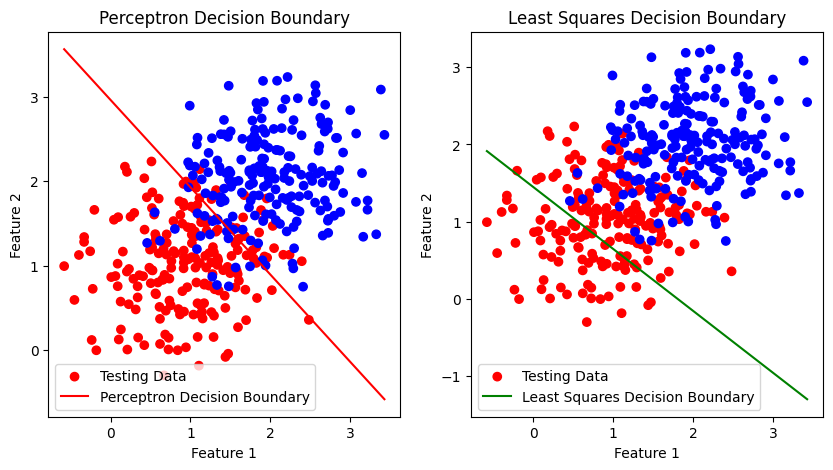

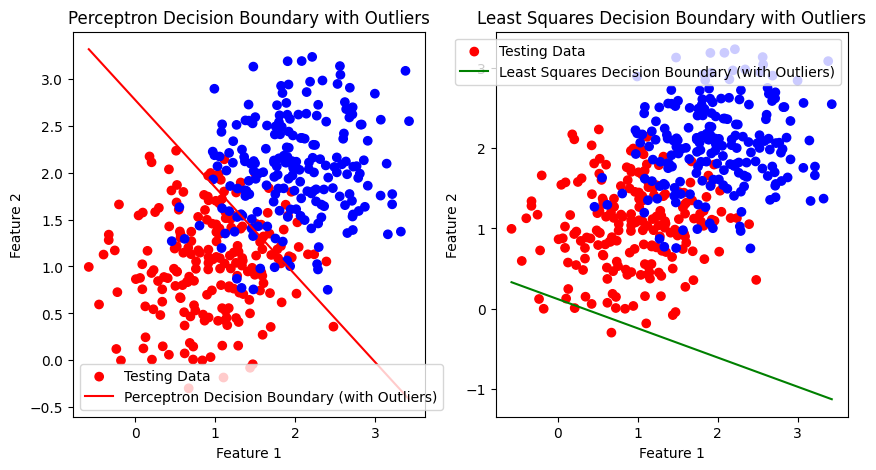

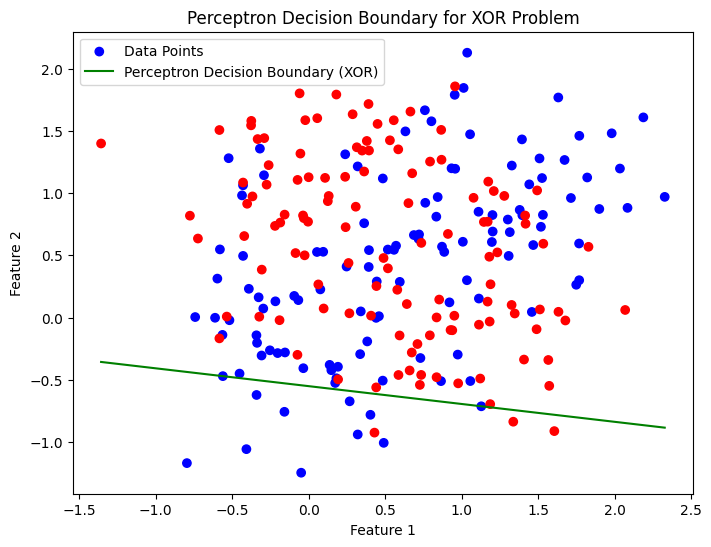

Accuracy with Perceptron for XOR problem: 0.79


In [161]:

########################################
# Part-3)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))            # Combine class1 training and class2 training data
tr_targets = np.array([0] * 50 + [1] * 50)                  # Class labels: 0 for class1, 1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))            # Combine class1 testing and class2 testing data
te_targets = np.array([0] * 200 + [1] * 200)                # Class labels: 0 for class1, 1 for class2


########################################
# Part-3)-(b)
########################################

def Perceptron(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, Testing data
    # Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 1000  # Number of epochs
    X = np.column_stack((X_train, np.ones(len(X_train))))  # Data. Append ones to the training data to take care of the bias
    w = np.random.rand(X.shape[1])  # Initialize the weight vector
    for epoch in range(epochs):
        # Compute the predictions
        predictions = np.where(np.dot(X, w) >= 0, 1, 0)
        # Compute the error
        error = Y_train - predictions
        # Update the weight vector
        w += np.dot(X.T, error)

    # Compute the test data predictions using the final weight vector
    X_test_bias = np.column_stack((X_test, np.ones(len(X_test))))  # Append ones to testing data for bias
    test_predictions = np.where(np.dot(X_test_bias, w) >= 0, 1, 0)

    # Return the test data predictions and the final weight vector
    return test_predictions, w


##########################################
# Plot the decision boundary using perceptron
##########################################

# Run Perceptron algorithm on training data
predictions_perceptron, decision_boundary_perceptron = Perceptron(tr_data, tr_targets, te_data)

# Plot decision boundary using Perceptron
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['red', 'blue']), marker='o', label='Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary line for Perceptron
slope_perceptron = -decision_boundary_perceptron[0] / decision_boundary_perceptron[1]
intercept_perceptron = -decision_boundary_perceptron[2] / decision_boundary_perceptron[1]
x_vals_perceptron = np.linspace(min(te_data[:, 0]), max(te_data[:, 0]), 100)
y_vals_perceptron = slope_perceptron * x_vals_perceptron + intercept_perceptron
plt.plot(x_vals_perceptron, y_vals_perceptron, '-r', label='Perceptron Decision Boundary')

plt.legend()
plt.title('Perceptron Decision Boundary')


##########################################
# Plot the decision boundary using least squares
##########################################

# Fit a linear regression model using least squares
lr_coefficients = np.linalg.lstsq(np.column_stack((tr_data, np.ones(len(tr_data)))), tr_targets, rcond=None)[0]

# Plot decision boundary using Least Squares
plt.subplot(1, 2, 2)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['red', 'blue']), marker='o', label='Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary line for Least Squares
slope_ls = -lr_coefficients[0] / lr_coefficients[1]
intercept_ls = -lr_coefficients[2] / lr_coefficients[1]
x_vals_ls = np.linspace(min(te_data[:, 0]), max(te_data[:, 0]), 100)
y_vals_ls = slope_ls * x_vals_ls + intercept_ls
plt.plot(x_vals_ls, y_vals_ls, '-g', label='Least Squares Decision Boundary')

plt.legend()
plt.title('Least Squares Decision Boundary')

plt.show()


##########################################
# Part-3)-(c): Add true outliers and compare Perceptron with Least Squares
##########################################

# Add true outliers to class2 training data
outliers = np.array([[5, 5], [6, 6], [7, 7]])
tr_data_outliers = np.concatenate((tr_data, outliers))
tr_targets_outliers = np.concatenate((tr_targets, np.ones(len(outliers))))

# Run Perceptron algorithm on training data with outliers
predictions_perceptron_outliers, decision_boundary_perceptron_outliers = Perceptron(tr_data_outliers, tr_targets_outliers, te_data)

# Plot decision boundary using Perceptron with outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['red', 'blue']), marker='o', label='Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary line for Perceptron with outliers
slope_perceptron_outliers = -decision_boundary_perceptron_outliers[0] / decision_boundary_perceptron_outliers[1]
intercept_perceptron_outliers = -decision_boundary_perceptron_outliers[2] / decision_boundary_perceptron_outliers[1]
x_vals_perceptron_outliers = np.linspace(min(te_data[:, 0]), max(te_data[:, 0]), 100)
y_vals_perceptron_outliers = slope_perceptron_outliers * x_vals_perceptron_outliers + intercept_perceptron_outliers
plt.plot(x_vals_perceptron_outliers, y_vals_perceptron_outliers, '-r', label='Perceptron Decision Boundary (with Outliers)')

plt.legend()
plt.title('Perceptron Decision Boundary with Outliers')

# Fit a linear regression model using least squares with outliers
lr_coefficients_outliers = np.linalg.lstsq(np.column_stack((tr_data_outliers, np.ones(len(tr_data_outliers)))), tr_targets_outliers, rcond=None)[0]

# Plot decision boundary using Least Squares with outliers
plt.subplot(1, 2, 2)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['red', 'blue']), marker='o', label='Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary line for Least Squares with outliers
slope_ls_outliers = -lr_coefficients_outliers[0] / lr_coefficients_outliers[1]
intercept_ls_outliers = -lr_coefficients_outliers[2] / lr_coefficients_outliers[1]
x_vals_ls_outliers = np.linspace(min(te_data[:, 0]), max(te_data[:, 0]), 100)
y_vals_ls_outliers = slope_ls_outliers * x_vals_ls_outliers + intercept_ls_outliers
plt.plot(x_vals_ls_outliers, y_vals_ls_outliers, '-g', label='Least Squares Decision Boundary (with Outliers)')

plt.legend()
plt.title('Least Squares Decision Boundary with Outliers')

plt.show()

##########################################
# Part-3)-(d): Data generation XOR
##########################################

# Set the parameters of Gaussian distributions
class1_mean1 = [0, 0]  # Mean of Gaussian1
class1_mean2 = [1, 1]  # Mean of Gaussian3
class2_mean1 = [1, 0]  # Mean of Gaussian2
class2_mean2 = [0, 1]  # Mean of Gaussian4
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate data from Gaussian distributions
class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60)

# Obtain 2-class dataset
class1 = np.concatenate((class1_data1, class1_data2))
class2 = np.concatenate((class2_data1, class2_data2))
X_xor = np.concatenate((class1, class2))
y_xor = np.concatenate((np.ones(len(class1)), -np.ones(len(class2))))

# Create train-test splits
from sklearn.model_selection import train_test_split

X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.4, random_state=42)

# Classify the dataset using the perceptron algorithm
predictions_xor, decision_boundary_xor = Perceptron(X_xor_train, y_xor_train, X_xor_test)

# Plot the decision boundary for XOR problem
plt.figure(figsize=(8, 6))
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap=ListedColormap(['red', 'blue']), marker='o', label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary line for XOR problem
slope_xor = -decision_boundary_xor[0] / decision_boundary_xor[1]
intercept_xor = -decision_boundary_xor[2] / decision_boundary_xor[1]
x_vals_xor = np.linspace(min(X_xor[:, 0]), max(X_xor[:, 0]), 100)
y_vals_xor = slope_xor * x_vals_xor + intercept_xor
plt.plot(x_vals_xor, y_vals_xor, '-g', label='Perceptron Decision Boundary (XOR)')

plt.legend()
plt.title('Perceptron Decision Boundary for XOR Problem')

plt.show()

# Compute and print the accuracy for XOR problem
acc_xor = np.mean(predictions_xor == y_xor_test)
print('Accuracy with Perceptron for XOR problem:', acc)

<b> Observations </b>

1. Perceptron algorithm is giving better results at finding decision boundary.

2. Least square seems to be giving bad results since the separation is linear here.

3. Accuracy with Perceptron for XOR problem is also steady at a good rate.

